### 김승현님 작업
-for 문으로 최적화

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint
from datetime import datetime
import collections
import re

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## 데이터 로드하기

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
mbsa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/text2.csv')
mbsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20400 non-null  int64 
 1   Date        20400 non-null  object
 2   text        20400 non-null  object
 3   Sentiment   20400 non-null  int64 
 4   text2       18655 non-null  object
dtypes: int64(2), object(3)
memory usage: 797.0+ KB


In [6]:
mbsa = mbsa[mbsa['text2'].notnull()]
mbsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18655 entries, 0 to 20399
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18655 non-null  int64 
 1   Date        18655 non-null  object
 2   text        18655 non-null  object
 3   Sentiment   18655 non-null  int64 
 4   text2       18655 non-null  object
dtypes: int64(2), object(3)
memory usage: 874.5+ KB


In [7]:
mbsa['Sentiment'].value_counts()

2    9245
0    9010
1     400
Name: Sentiment, dtype: int64

## train_test_split

In [8]:
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = \
  train_test_split(mbsa['text2'], mbsa['Sentiment'],
                  test_size = 0.2,
                  random_state = 1004,
                  stratify = mbsa['Sentiment'])

In [9]:
x_train_all

17856    Free Download Tradent v Bitcoin Cryptocurrency...
6587     Senior Linux Engineer VMware INNOVITUSA Inc Ed...
829      coin Killing Top Gainers Why trust Reason Top ...
8421                    good job aidropbounty successfully
19870    As bitcoin recovers Argentinean peso continues...
                               ...                        
1349     IDOLBTC Price sat Volume BTC IDOLDOGE Price DO...
16365    Bitcoin Energy Requirements Climbing Even Reve...
2560                                  START BITCOIN MINING
1651                                                  gbtc
4741     year idiot top guarantee walk around bitcoin g...
Name: text2, Length: 14924, dtype: object

## 토큰화

In [10]:
X_train = [sentence.split(' ') for sentence in x_train_all]
X_train[:3]

[['Free',
  'Download',
  'Tradent',
  'v',
  'Bitcoin',
  'Cryptocurrency',
  'Theme',
  'Themelock'],
 ['Senior',
  'Linux',
  'Engineer',
  'VMware',
  'INNOVITUSA',
  'Inc',
  'Edison',
  'United',
  'States'],
 ['coin',
  'Killing',
  'Top',
  'Gainers',
  'Why',
  'trust',
  'Reason',
  'Top',
  'Gainers']]

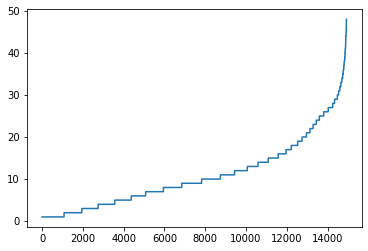

In [11]:
sentence_len = [len(sentence) for sentence in X_train]
sentence_len.sort()

plt.plot(sentence_len)
plt.show()

In [12]:
sentences_new = []

for sentence in X_train:
    sentences_new.append([word for word in sentence][:50])

X_train = sentences_new

for i in range(5):
    print(X_train[i])

['Free', 'Download', 'Tradent', 'v', 'Bitcoin', 'Cryptocurrency', 'Theme', 'Themelock']
['Senior', 'Linux', 'Engineer', 'VMware', 'INNOVITUSA', 'Inc', 'Edison', 'United', 'States']
['coin', 'Killing', 'Top', 'Gainers', 'Why', 'trust', 'Reason', 'Top', 'Gainers']
['good', 'job', 'aidropbounty', 'successfully']
['As', 'bitcoin', 'recovers', 'Argentinean', 'peso', 'continues', 'sag']


In [13]:
max(sentence_len)

48

In [14]:
X_test = [sentence.split(' ') for sentence in x_test]
sentences_new = []

for sentence in X_test:
    sentences_new.append([word for word in sentence][:50])

X_test = sentences_new
X_test[:3]

[['The', 'bitcoin', 'market', 'summed'],
 ['get', 'voucher'],
 ['Excelente', 'Proyecto']]

## 정수 인코딩

In [15]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

print(tokenizer.word_index)

{'bitcoin': 1, 'btc': 2, 'usd': 3, 'price': 4, 'i': 5, 'eth': 6, 'xrp': 7, 'the': 8, 'crypto': 9, 'new': 10, 'de': 11, 'market': 12, 'ltc': 13, 'free': 14, 'bch': 15, 'trading': 16, 'buy': 17, 'money': 18, 'get': 19, 'time': 20, 'may': 21, 'via': 22, 'k': 23, 'like': 24, 'one': 25, 'day': 26, 'coin': 27, 'h': 28, 'volume': 29, 'xlm': 30, 'even': 31, 'trx': 32, 'exchange': 33, 'x': 34, 'you': 35, 'current': 36, 'eos': 37, 'blockchain': 38, 'dont': 39, 'is': 40, 'this': 41, 'en': 42, 'still': 43, 'cash': 44, 'neo': 45, 'mining': 46, 'wa': 47, 'value': 48, 'last': 49, 'etf': 50, 'ethereum': 51, 'primexbt': 52, 'earn': 53, 'ada': 54, 'in': 55, 'and': 56, 'trade': 57, 'good': 58, 'cryptocurrency': 59, 'binance': 60, 'join': 61, 'worth': 62, 'make': 63, 'news': 64, 'link': 65, 'high': 66, 'bnb': 67, 'change': 68, 'el': 69, 'year': 70, 'people': 71, 'use': 72, 'long': 73, 'top': 74, 'going': 75, 'know': 76, 'la': 77, 'leverage': 78, 'great': 79, 'to': 80, 'xmr': 81, 'think': 82, 'project': 83

In [16]:
threshold = 1
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 : ', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수 : %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율 : ', (rare_cnt / total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : ', (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 :  17761
등장 빈도가 0번 이하인 희귀 단어의 수 : 0
단어 집합에서 희귀 단어의 비율 :  0.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :  0.0


In [17]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 : ', vocab_size)

단어 집합의 크기 :  17762


In [18]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# train_X = pad_sequences(train_X, padding = 'post')
print(X_train[:3])

[[14, 764, 5628, 141, 1, 59, 4425, 5629], [2415, 8066, 1829, 8067, 8068, 1455, 8069, 1031, 723], [27, 3737, 74, 2888, 180, 551, 633, 74, 2888]]


In [19]:
y_train = np.array(y_train_all)
y_test = np.array(y_test)

In [20]:
word_index = tokenizer.word_index

import json 
json = json.dumps(word_index)
f3 = open('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/engIndex.json', 'w')
f3.write(json)
f3.close()

## 빈 샘플(empty samples) 제거

In [21]:
drop_train =[index for index, sentence in enumerate(X_train) \
             if len(sentence) < 1]

In [22]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

14924
14924


## 패딩

리뷰의 최대 길이 :  48
리뷰의 평균 길이 :  10.868399892790137


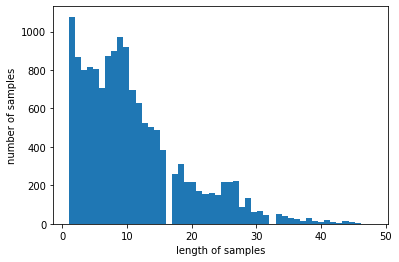

In [23]:
print('리뷰의 최대 길이 : ', max(len(l) for l in X_train))
print('리뷰의 평균 길이 : ', sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [24]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율 : %s'%(max_len, (count / len(nested_list)*100)))

In [25]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율 : 97.40016081479496


In [26]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [27]:
np.save('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/X_train.npy', X_train)
np.save('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/X_test.npy', X_test)
np.save('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/y_train.npy', y_train)
np.save('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/y_test.npy', y_test)

## ndarray 불러오기

In [28]:
X_train = np.load('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/X_train.npy')
X_test = np.load('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/X_test.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/y_test.npy')

In [29]:
y_train

array([0, 2, 2, ..., 2, 2, 2])

In [30]:
X_train

array([[    0,     0,     0, ...,    59,  4425,  5629],
       [    0,     0,     0, ...,  8069,  1031,   723],
       [    0,     0,     0, ...,   633,    74,  2888],
       ...,
       [    0,     0,     0, ...,   113,     1,    46],
       [    0,     0,     0, ...,     0,     0,  1762],
       [    0,     0,     0, ...,    25,  3446, 17761]], dtype=int32)

## LSTM 분류

In [31]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [1]:
embedding_dim = [100, 200, 400]
hidden_units = [32, 64, 128, 256, 512]
epochs = [400]
batch_size = [16, 32, 64, 128]
validation_split = [ 0.1, 0.2, 0.3]

recoding = []

for i in embedding_dim :
  for j in hidden_units :
    model = Sequential()
    model.add(Embedding(vocab_size, i))
    model.add(LSTM(j))
    model.add(Dense(3, activation='softmax'))

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
    mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/models/history10.h5',
                     monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    
    for a in epochs:
      for b in batch_size:
        for c in validation_split:
          model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
          history = model.fit(X_train, y_train, epochs=a, callbacks=[es, mc],
                                          batch_size=b, validation_split=c)
          
          loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/models/history10.h5')
          print('\n 테스트 정확도 : %.4f' % (loaded_model.evaluate(X_test, y_test)[1]))
          y = '%.4f' % (loaded_model.evaluate(X_test, y_test)[1])

          x_embedding_dim = i
          x_hidden_units = j
          x_epochs = a
          x_batch_size = b
          x_validation_split = c

          X = [x_embedding_dim, x_hidden_units ,x_epochs , x_batch_size, x_validation_split,y]
          recoding.append(X) 




NameError: ignored

In [ ]:
# 여기서 최고의 값 찾기
recoding

[[100, 32, 400, 32, 0.1, '0.6350'],
 [100, 32, 400, 32, 0.2, '0.6767'],
 [100, 32, 400, 32, 0.3, '0.7615'],
 [100, 32, 400, 64, 0.1, '0.7615'],
 [100, 32, 400, 64, 0.2, '0.7615'],
 [100, 32, 400, 64, 0.3, '0.9613'],
 [100, 32, 400, 128, 0.1, '0.9613'],
 [100, 32, 400, 128, 0.2, '0.9613'],
 [100, 32, 400, 128, 0.3, '1.0543'],
 [100, 64, 400, 32, 0.1, '0.6422'],
 [100, 64, 400, 32, 0.2, '0.6981'],
 [100, 64, 400, 32, 0.3, '0.7683'],
 [100, 64, 400, 64, 0.1, '0.7683'],
 [100, 64, 400, 64, 0.2, '0.7683'],
 [100, 64, 400, 64, 0.3, '0.9704'],
 [100, 64, 400, 128, 0.1, '0.9704'],
 [100, 64, 400, 128, 0.2, '0.9704'],
 [100, 64, 400, 128, 0.3, '0.9955'],
 [100, 128, 400, 32, 0.1, '0.6185'],
 [100, 128, 400, 32, 0.2, '0.6740'],
 [100, 128, 400, 32, 0.3, '0.8506'],
 [100, 128, 400, 64, 0.1, '0.8506'],
 [100, 128, 400, 64, 0.2, '1.0601'],
 [100, 128, 400, 64, 0.3, '1.0460'],
 [100, 128, 400, 128, 0.1, '1.0460'],
 [100, 128, 400, 128, 0.2, '1.0460'],
 [100, 128, 400, 128, 0.3, '1.2753'],
 [100, 256

In [ ]:
embedding_dim = 400
hidden_units = 256

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(3, activation='softmax'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/models/history10.h5',
                     monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=400, callbacks=[es, mc],
                    batch_size=128, validation_split=0.2)

Epoch 1/400
94/94 [==============================] - ETA: 0s - loss: 0.7391 - acc: 0.5824
Epoch 00001: val_acc improved from -inf to 0.65662, saving model to /content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/models/history10.h5
94/94 [==============================] - 37s 375ms/step - loss: 0.7391 - acc: 0.5824 - val_loss: 0.6242 - val_acc: 0.6566
Epoch 2/400
94/94 [==============================] - ETA: 0s - loss: 0.5377 - acc: 0.7326
Epoch 00002: val_acc improved from 0.65662 to 0.66131, saving model to /content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/models/history10.h5
94/94 [==============================] - 36s 380ms/step - loss: 0.5377 - acc: 0.7326 - val_loss: 0.6309 - val_acc: 0.6613
Epoch 3/400
94/94 [==============================] - ETA: 0s - loss: 0.4372 - acc: 0.7949
Epoch 00003: val_acc improved from 0.66131 to 0.68275, saving model to /content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/models/history10.

In [ ]:
#epochs 15 batch_size=64
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/models/history10.h5')
print('\n 테스트 정확도 : %.4f' % (loaded_model.evaluate(X_test, y_test)[0]))

117/117 [==============================] - 1s 10ms/step - loss: 0.6217 - acc: 0.6837

 테스트 정확도 : 0.6217


In [ ]:
#epochs 400 ;early stopping 6, batch_size=64
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/models/history10.h5')
print('\n 테스트 정확도 : %.4f' % (loaded_model.evaluate(X_test, y_test)[0]))

117/117 [==============================] - 2s 9ms/step - loss: 0.6704 - acc: 0.6778

 테스트 정확도 : 0.6704


In [ ]:
#epochs 400 ;early stopping 7, batch_size=128
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/models/history10.h5')
print('\n 테스트 정확도 : %.4f' % (loaded_model.evaluate(X_test, y_test)[0]))

117/117 [==============================] - 2s 9ms/step - loss: 0.8045 - acc: 0.6961

 테스트 정확도 : 0.8045


In [ ]:
#epochs 400 ;early stopping 6, batch_size=128 embedding_dim = 200 hidden_units = 256
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/models/history10.h5')
print('\n 테스트 정확도 : %.4f' % (loaded_model.evaluate(X_test, y_test)[0]))

117/117 [==============================] - 3s 26ms/step - loss: 0.6952 - acc: 0.6864

 테스트 정확도 : 0.6952


In [ ]:
#epochs 400 ;early stopping 6, batch_size=128 embedding_dim = 400 hidden_units = 256
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/models/history10.h5')
print('\n 테스트 정확도 : %.4f' % (loaded_model.evaluate(X_test, y_test)[0]))

117/117 [==============================] - 4s 32ms/step - loss: 0.6699 - acc: 0.6765

 테스트 정확도 : 0.6699


In [ ]:
#epochs 400 ;early stopping 6, batch_size=128 embedding_dim = 400 hidden_units = 256
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_sentiment/models/history10.h5')
a = '%.4f' % (loaded_model.evaluate(X_test, y_test)[0])
a

117/117 [==============================] - 1s 8ms/step - loss: 1.0322 - acc: 0.6880


'1.0322'

## 리뷰 예측

In [ ]:
predictions = loaded_model.predict(X_test)

In [ ]:
predictions

array([[4.9612355e-01, 2.4204047e-02, 4.7967243e-01],
       [9.6357971e-01, 1.9431347e-04, 3.6225922e-02],
       [9.9959284e-01, 1.8087759e-04, 2.2628444e-04],
       ...,
       [8.5015081e-02, 4.1185450e-04, 9.1457307e-01],
       [6.6494040e-02, 2.0374920e-05, 9.3348563e-01],
       [3.1545484e-01, 8.0264278e-04, 6.8374252e-01]], dtype=float32)

In [ ]:
predict = pd.DataFrame(predictions)
predict

,0,1,2
0,0.496124,0.024204,0.479672
1,0.963580,0.000194,0.036226
2,0.999593,0.000181,0.000226
3,0.501080,0.033301,0.465618
4,0.727823,0.000436,0.271740
...,...,...,...
3726,0.109670,0.001522,0.888809
3727,0.288468,0.003931,0.707601
3728,0.085015,0.000412,0.914573
3729,0.066494,0.000020,0.933486


In [ ]:
predict['s'] = 0
for i in range(3731):
    predict['s'][i] = predict.iloc[i].idxmax()
predict['s'].value_counts()

2    2085
0    1566
1      80
Name: s, dtype: int64